In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [218]:
data=pd.read_csv('data/csv/cleaned/LionAir.csv')
data.head()

,text,label
0,Being re-booked on this flight I was not rea...,0
1,"Filthy airplane, delays, and no whatsoever i...",0
2,Makassar to Surabaya. Searching for the chea...,0
3,Makassar to Singapore via Jakarta. Expensive...,0
4,Jakarta to Denpasar. Due to take off 7 pm. D...,0


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    198 non-null    object
 1   label   198 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [220]:
print('Total Jumlah Komentar : ',data.shape[0],'data\n')
print('Terdiri dari (label) : ')
print('-- [0] Sentimen Negatif\t : ',data[data.label==0].shape[0],'data')
print('-- [1] Sentimen Positif\t : ',data[data.label==1].shape[0],'data')

Total Jumlah Komentar :  198 data

Terdiri dari (label) : 
-- [0] Sentimen Negatif	 :  131 data
-- [1] Sentimen Positif	 :  67 data


<function matplotlib.pyplot.show(close=None, block=None)>

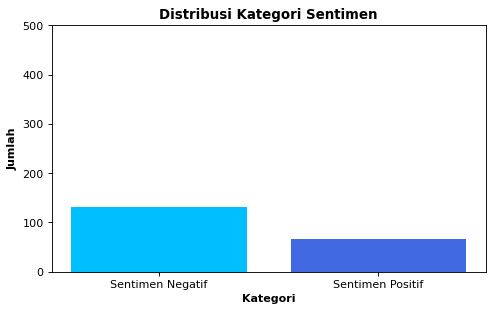

In [221]:
height=data['label'].value_counts()
labels=('Sentimen Negatif','Sentimen Positif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,500)
plt.title('Distribusi Kategori Sentimen',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show

In [222]:
import re
def casefolding(text):
    text=text.lower()
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub(r'[-+]?[0-9]+','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=text.strip()
    return text

In [223]:
raw_sample=data['text'].iloc[10]
case_folded=casefolding(raw_sample)

print('Raw Data\t : ',raw_sample)
print('Case Folded\t : ',case_folded)

Raw Data	 :  both flights using the new B737-900. Cabin clean bright and airy. I was impressed that food (hot meal dessert and salad - all served on a tray) + drinks were served for both flights. Pity that load factor for both legs was less than 40% and no inflight entertainment was offered at all. It's a great flying experience overall.
Case Folded	 :  both flights using the new b cabin clean bright and airy i was impressed that food hot meal dessert and salad  all served on a tray  drinks were served for both flights pity that load factor for both legs was less than  and no inflight entertainment was offered at all its a great flying experience overall


In [224]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

stopwords_eng=stopwords.words('english')

In [225]:
len(stopwords_eng)

179

In [226]:
stopwords_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [227]:
more_stopwords=['cz','b','cuz','bcs','btw','kl','cnxkul','ava','ak','dps','aa','penbkk','kulgw','bki','sin','flight','er','lion','air','airasia']
stopwords_eng=stopwords_eng+more_stopwords

def remove_stop_words(text):
    clean_words=[]
    text=text.split()
    for word in text:
        if word not in stopwords_eng:
            clean_words.append(word)
    return " ".join(clean_words)

In [228]:
raw_sample=data['text'].iloc[10]
case_folded=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folded)

print('Raw Data\t : ',raw_sample)
print('Case Folded\t : ',case_folded)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	 :  both flights using the new B737-900. Cabin clean bright and airy. I was impressed that food (hot meal dessert and salad - all served on a tray) + drinks were served for both flights. Pity that load factor for both legs was less than 40% and no inflight entertainment was offered at all. It's a great flying experience overall.
Case Folded	 :  both flights using the new b cabin clean bright and airy i was impressed that food hot meal dessert and salad  all served on a tray  drinks were served for both flights pity that load factor for both legs was less than  and no inflight entertainment was offered at all its a great flying experience overall
Stopword Removal	:  flights using new cabin clean bright airy impressed food hot meal dessert salad served tray drinks served flights pity load factor legs less inflight entertainment offered great flying experience overall


In [229]:
from nltk.stem.snowball import SnowballStemmer

EngStem=SnowballStemmer('english')

def stemming(text):
    text=EngStem.stem(text)
    return text

In [230]:
raw_sample=data['text'].iloc[10]
case_folded=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folded)
text_stemming=stemming(stopword_removal)

print('Raw Data\t : ',raw_sample)
print('Case Folded\t : ',case_folded)
print('Stopword Removal\t: ',stopword_removal)
print('Stemming\t\t: ',text_stemming)

Raw Data	 :  both flights using the new B737-900. Cabin clean bright and airy. I was impressed that food (hot meal dessert and salad - all served on a tray) + drinks were served for both flights. Pity that load factor for both legs was less than 40% and no inflight entertainment was offered at all. It's a great flying experience overall.
Case Folded	 :  both flights using the new b cabin clean bright and airy i was impressed that food hot meal dessert and salad  all served on a tray  drinks were served for both flights pity that load factor for both legs was less than  and no inflight entertainment was offered at all its a great flying experience overall
Stopword Removal	:  flights using new cabin clean bright airy impressed food hot meal dessert salad served tray drinks served flights pity load factor legs less inflight entertainment offered great flying experience overall
Stemming		:  flights using new cabin clean bright airy impressed food hot meal dessert salad served tray drinks s

In [231]:
def text_preprocessing_process(text):
    text=casefolding(text)
    text=remove_stop_words(text)
    text=stemming(text)
    return text

In [232]:
%%time
data['clean_text']=data['text'].apply(text_preprocessing_process)

CPU times: total: 78.1 ms
Wall time: 70 ms


In [233]:
data

,text,label,clean_text
0,Being re-booked on this flight I was not rea...,0,rebooked really thrilled option given definite...
1,"Filthy airplane, delays, and no whatsoever i...",0,filthy airplane delays whatsoever interaction ...
2,Makassar to Surabaya. Searching for the chea...,0,makassar surabaya searching cheapest route fin...
3,Makassar to Singapore via Jakarta. Expensive...,0,makassar singapore via jakarta expensive bagga...
4,Jakarta to Denpasar. Due to take off 7 pm. D...,0,jakarta denpasar due take pm delay information...
...,...,...,...
193,Both legs using new Boeing 737-900 ER. Departe...,1,legs using new boeing departed ontime even ear...
194,SIN-DPS-SIN on 737-900ER. Latest entrant on th...,1,sindpssin latest entrant prized route take adv...
195,Padang-Jakarta sector - airline seems more lik...,1,padangjakarta sector airline seems like shuttl...
196,Padang-Jakarta sector - airline seems more lik...,1,padangjakarta sector airline seems like shuttl...


In [234]:
data.to_csv('data/csv/cleaned/JetstarAsia(processed).csv')

In [235]:
x=data['clean_text']
y=data['label']

In [236]:
x

0      rebooked really thrilled option given definite...
1      filthy airplane delays whatsoever interaction ...
2      makassar surabaya searching cheapest route fin...
3      makassar singapore via jakarta expensive bagga...
4      jakarta denpasar due take pm delay information...
                             ...                        
193    legs using new boeing departed ontime even ear...
194    sindpssin latest entrant prized route take adv...
195    padangjakarta sector airline seems like shuttl...
196    padangjakarta sector airline seems like shuttl...
197    service good compared value airlines food serv...
Name: clean_text, Length: 198, dtype: object

In [237]:
y

0      0
1      0
2      0
3      0
4      0
      ..
193    1
194    1
195    1
196    1
197    1
Name: label, Length: 198, dtype: int64

In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_TF_IDF=TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)
x_tf_idf=vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open('jetstarasia_feature_tfidf.pkl','wb'))

In [239]:
vec_TF_IDF.vocabulary_

{'rebooked': 1714,
 'really': 1707,
 'thrilled': 2151,
 'option': 1492,
 'given': 914,
 'definitely': 556,
 'isnt': 1115,
 'favourite': 806,
 'airline': 57,
 'one': 1476,
 'reasons': 1712,
 'poor': 1614,
 'seatpitch': 1861,
 'gets': 905,
 'must': 1390,
 'admit': 31,
 'pleased': 1603,
 'get': 904,
 'emergency': 683,
 'exit': 751,
 'seat': 1857,
 'lots': 1267,
 'place': 1589,
 'stretch': 2047,
 'moreover': 1376,
 'excited': 748,
 'fly': 842,
 'boeing': 271,
 'common': 438,
 'though': 2146,
 'many': 1306,
 'usual': 2286,
 'nonexisting': 1435,
 'service': 1897,
 'offer': 1461,
 'sell': 1877,
 'onboard': 1475,
 'noticed': 1442,
 'elevated': 676,
 'number': 1447,
 'attendants': 178,
 'quite': 1687,
 'turbulent': 2218,
 'landed': 1186,
 'saf': 1820,
 'filthy': 820,
 'airplane': 60,
 'delays': 560,
 'whatsoever': 2358,
 'interaction': 1101,
 'crew': 525,
 'besides': 249,
 'welcome': 2347,
 'goodbye': 923,
 'horrible': 1005,
 'checkin': 388,
 'disorganised': 616,
 'boarding': 267,
 'delay': 557

In [240]:
print(len(vec_TF_IDF.get_feature_names()))

2421


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [241]:
print(vec_TF_IDF.get_feature_names())

['abadi', 'abandon', 'aber', 'able', 'absolute', 'absolutely', 'abzocke', 'ac', 'accept', 'acceptable', 'accessible', 'accommodate', 'accommodation', 'accomodate', 'accompanied', 'according', 'accrue', 'accumulated', 'aceh', 'across', 'acted', 'action', 'actively', 'activities', 'activity', 'actual', 'actually', 'add', 'additional', 'adhered', 'adjacent', 'admit', 'advance', 'advantage', 'advertise', 'advertising', 'advice', 'advise', 'advised', 'advising', 'advisory', 'affordable', 'africa', 'afternoon', 'age', 'agent', 'agents', 'ages', 'ago', 'agree', 'agung', 'ahead', 'airconditioning', 'aircraft', 'aircrafts', 'airfi', 'airlin', 'airline', 'airlines', 'airon', 'airplane', 'airplanes', 'airport', 'airports', 'airs', 'airshow', 'airtime', 'airy', 'aisle', 'aisles', 'alas', 'alert', 'alloc', 'allocated', 'allowance', 'allowed', 'allright', 'almost', 'alone', 'along', 'alongside', 'already', 'alright', 'als', 'also', 'altered', 'alternative', 'although', 'always', 'amazed', 'amazing',

In [242]:
x1=vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,abadi,abandon,aber,able,absolute,absolutely,abzocke,ac,accept,acceptable,...,yogyakarta,yogyharata,youd,young,youre,youve,zero,zu,zwar,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
data_tabular_tf_idf.iloc[10:20,60:70]

,airplane,airplanes,airport,airports,airs,airshow,airtime,airy,aisle,aisles
10,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.225412,0.0,0.0
11,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
12,0.000000,0.0,0.069727,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
13,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
14,0.097663,0.0,0.061253,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
15,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
16,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17,0.000000,0.0,0.062902,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18,0.000000,0.0,0.193911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [244]:
x1=vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abadi,abandon,aber,able,absolute,absolutely,abzocke,ac,accept,acceptable,...,yogyakarta,yogyharata,youd,young,youre,youve,zero,zu,zwar,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
x_train1=np.array(data_tabular_tf_idf)
y_train1=np.array(y)

In [246]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [277]:
x=x_train1
y=data.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [278]:
print('Banyak data x_train : ',len(x_train))
print('Banyak data x_test : ',len(x_test))
print('Banyak data y_train : ',len(y_train))
print('Banyak data y_test : ',len(y_test))

Banyak data x_train :  158
Banyak data x_test :  40
Banyak data y_train :  158
Banyak data y_test :  40


In [279]:
from datetime import datetime
start_time=datetime.now()

text_algorithm=MultinomialNB()
model=text_algorithm.fit(x_train,y_train)

filename='jetstarasia_sentiment.sav'
pickle.dump(model,open(filename,'wb'))

end_time=datetime.now()
result_time=end_time-start_time
print("Duration : ",result_time)

Duration :  0:00:00.003996


In [280]:
predicted=model.predict(x_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
from sklearn.metrics import confusion_matrix,classification_report

newprediksibenar=(predicted==y_test).sum()
newprediksisalah=(predicted!=y_test).sum()

print('Prediksi benar : ',newprediksibenar,' data')
print('Prediksi salah : ',newprediksisalah,' data')
print('Akurasi algoritma : ',newprediksibenar/(newprediksibenar+newprediksisalah)*100,'%')

cm=confusion_matrix(y_test,predicted)

TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print('TRUE NEGATIVE (TN) : ',TN)
print('FALSE NEGATIVE (FN) : ',FN)
print('TRUE POSITIVE (TP) : ',TP)
print('FALSE POSITIVE (FP) : ',FP)
print('PRECISION : ',precision*100,'%')
print('RECALL : ',recall*100,'%')

print(classification_report(y_test,predicted))

Prediksi benar :  28  data
Prediksi salah :  12  data
Akurasi algoritma :  70.0 %
TRUE NEGATIVE (TN) :  26
FALSE NEGATIVE (FN) :  12
TRUE POSITIVE (TP) :  2
FALSE POSITIVE (FP) :  0
PRECISION :  100.0 %
RECALL :  14.285714285714285 %
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       1.00      0.14      0.25        14

    accuracy                           0.70        40
   macro avg       0.84      0.57      0.53        40
weighted avg       0.79      0.70      0.62        40

